In [2]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [52]:
df = pd.read_csv('Volatile.csv',parse_dates=['변환'])

In [53]:
df.head()

,변환,원자료,원자료.1,원자료.2,원자료.3
0,2001-01-02,"1,259.70",NaN,"1,099.07","1,185.38"
1,2001-01-03,"1,267.80",NaN,"1,108.07","1,205.49"
2,2001-01-04,"1,285.40",NaN,"1,128.53","1,193.24"
3,2001-01-05,"1,249.30",NaN,"1,078.01","1,190.90"
4,2001-01-08,"1,267.80",NaN,"1,088.71","1,215.06"


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   변환      5434 non-null   datetime64[ns]
 1   원자료     5434 non-null   object        
 2   원자료.1   1703 non-null   float64       
 3   원자료.2   5434 non-null   object        
 4   원자료.3   5434 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 212.4+ KB


In [55]:
df.drop(axis=1,columns=['원자료.1','원자료.2','원자료.3'],inplace=True)
df.head()

,변환,원자료
0,2001-01-02,"1,259.70"
1,2001-01-03,"1,267.80"
2,2001-01-04,"1,285.40"
3,2001-01-05,"1,249.30"
4,2001-01-08,"1,267.80"


In [56]:
df.columns=['DateTime','DollarEx']
#df.index.name='DateTime'

In [57]:
df.columns

Index(['DateTime', 'DollarEx'], dtype='object')

In [58]:
df.head()

,DateTime,DollarEx
0,2001-01-02,"1,259.70"
1,2001-01-03,"1,267.80"
2,2001-01-04,"1,285.40"
3,2001-01-05,"1,249.30"
4,2001-01-08,"1,267.80"


* 공휴일은 이전 영업일 환율을 사용 

In [59]:
import datetime
new_df=df.copy()
add_index=0
for num,i in enumerate(df['DateTime']):
    if num!=5433:
        while df['DateTime'][num+1]-new_df['DateTime'][num+add_index] > datetime.timedelta(1):
            holdate=(new_df['DateTime'][num+add_index]+datetime.timedelta(days=1))
            new_row=pd.DataFrame({'DateTime':[holdate],'DollarEx':[df['DollarEx'][num]]})
            # 데이터 프레임을 만들때 모든 Value가 스칼라일 경우 오류가 발생하므로 리스트를 사용해서 
            # 데이터 프레임을 만들어 주거나 ,index하고 index를 range로 작성해주면 된다
            # pandas DataFrame: ValueError: If using all scalar values, you must pass an index
            new_df=pd.concat([new_df.iloc[:num+1+add_index],new_row,new_df.iloc[num+1+add_index:]],ignore_index=True)
            add_index=add_index+1
        
    else: break

new_df

,DateTime,DollarEx
0,2001-01-02,"1,259.70"
1,2001-01-03,"1,267.80"
2,2001-01-04,"1,285.40"
3,2001-01-05,"1,249.30"
4,2001-01-06,"1,249.30"
...,...,...
7993,2022-11-21,"1,340.00"
7994,2022-11-22,"1,352.30"
7995,2022-11-23,"1,355.70"
7996,2022-11-24,"1,352.30"


In [60]:
new_df.set_index('DateTime',inplace=True)
new_df

,DollarEx
DateTime,
2001-01-02,"1,259.70"
2001-01-03,"1,267.80"
2001-01-04,"1,285.40"
2001-01-05,"1,249.30"
2001-01-06,"1,249.30"
...,...
2022-11-21,"1,340.00"
2022-11-22,"1,352.30"
2022-11-23,"1,355.70"


In [61]:
#Value String을 Float값으로 바꾸기
for num,i in enumerate(new_df['DollarEx']):
    i=i.replace(',','',1) # count는 변경하고 싶은 횟수 입력
    i=float(i)
    new_df['DollarEx'][num]=i

new_df['DollarEx'].head()

DateTime
2001-01-02    1259.7
2001-01-03    1267.8
2001-01-04    1285.4
2001-01-05    1249.3
2001-01-06    1249.3
Name: DollarEx, dtype: object

In [211]:
new_train=new_df.iloc[:-24]
new_test=new_df.iloc[-24:]

In [63]:
display(new_test)

,DollarEx
DateTime,
2022-11-02,1421.7
2022-11-03,1418.0
2022-11-04,1422.1
2022-11-05,1422.1
2022-11-06,1422.1
2022-11-07,1422.4
2022-11-08,1406.5
2022-11-09,1387.3
2022-11-10,1368.3


In [133]:
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(new_df.values)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('critical values:')
    for key, value in result[4].items():
        print('{0}:{1}'.format(key,value))
# adf_test의 귀무가설: 시계열이 Stationary가 아니다

In [134]:
adf_test(new_df)
# Non-Stationary 이다
# seasonal component가 있나?

ADF Statistics: -2.2613209133547585
p-value: 0.18474624788032085
critical values:
1%:-3.4311710629085694
5%:-2.861902850768548
10%:-2.5669631407781335


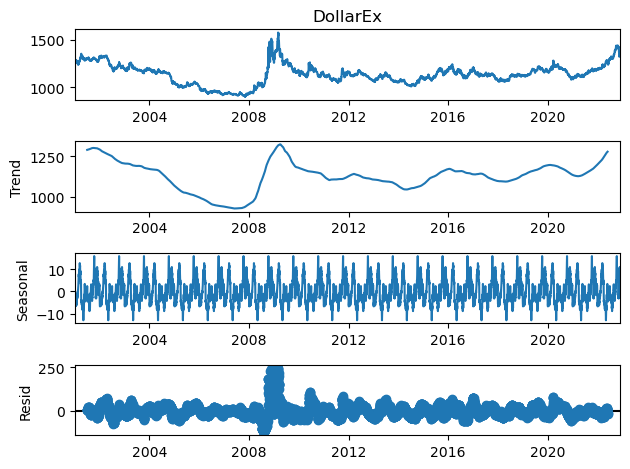

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposing=seasonal_decompose(new_df['DollarEx'],period=365)
decomposing.plot();

* 왜 계절성이 나타날까 궁금했다
---
해결: seasonal_decompose로 나타나는 seasonality는 trend를 기준으로 증가 감소 폭을 나타낸 것이기 때문에 그렇다.<br> 만약 period=100으로 낮추면 trend window size=100이 돼서 더 짧게 짧게 Trend가 변하고 seasonal은 그만큼 복잡해지게 된다

# 먼저 Holt-Winters 기법으로 예측
+ seasonal에 따른 성능 비교

In [261]:
import numpy as np
model = ExponentialSmoothing(endog=np.array(new_train['DollarEx']),trend='mul',
                             dates=new_train.index,freq='d')
model2 = ExponentialSmoothing(endog=np.array(new_train['DollarEx']),trend='mul',
                             dates=new_train.index,freq='d',seasonal='mul',
                              seasonal_periods = 365) 
# 250이 {220,235,250,400,365} 중에 성능이 제일 괜찮음

In [262]:
#model fitting
n_model = model.fit()
n_model2 = model2.fit()

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [263]:
#model predict
forecast1 = n_model.predict(start = new_test.index[0],end = new_test.index[-1])
forecast2 = n_model2.predict(start = new_test.index[0],end = new_test.index[-1])
print(forecast1)
print(forecast2)

[1422.21454579 1422.24347829 1422.27241137 1422.30134505 1422.33027931
 1422.35921416 1422.3881496  1422.41708563 1422.44602224 1422.47495945
 1422.50389724 1422.53283563 1422.5617746  1422.59071416 1422.61965431
 1422.64859504 1422.67753637 1422.70647829 1422.73542079 1422.76436388
 1422.79330756 1422.82225183 1422.85119669 1422.88014214]
[1422.83048768 1421.0962433  1421.74238619 1420.91534525 1418.73663408
 1417.68535741 1417.94393068 1417.21080843 1416.39728257 1419.35908356
 1418.67218213 1419.37137878 1417.64798893 1416.99912221 1416.41070832
 1416.78947285 1417.58535538 1416.92977502 1417.66601181 1418.74973786
 1416.442886   1414.6500386  1414.98477882 1413.59128503]


In [264]:
import matplotlib.pyplot as plt

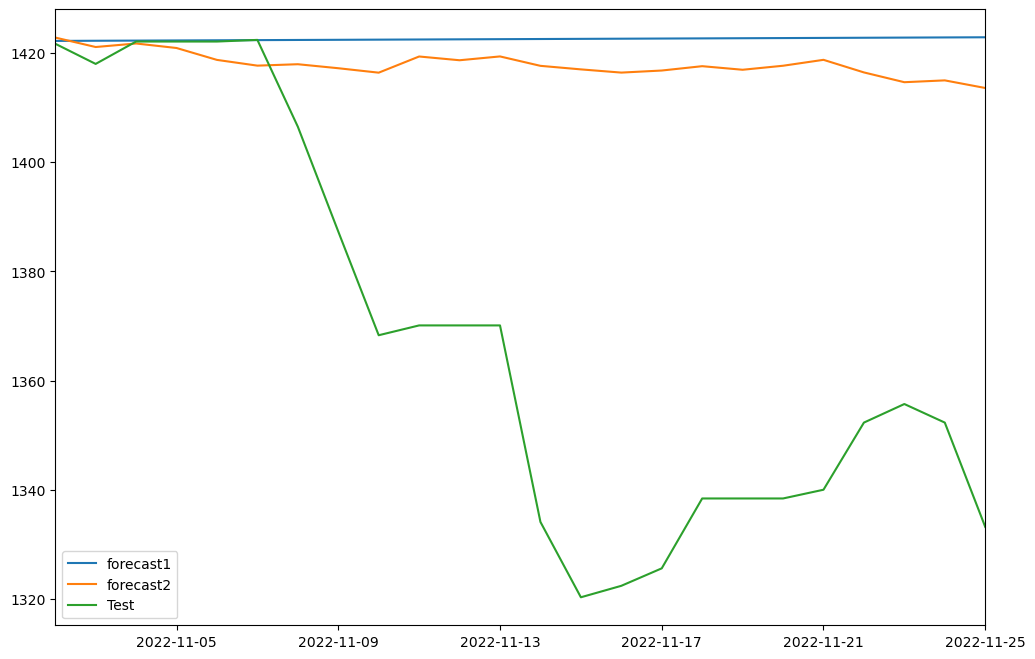

In [265]:
start = new_test.index[0]
end = new_test.index[-1]
plt.figure(figsize=(12,8))
plt.xlim(start,end)
plt.plot(pd.date_range(start=new_test.index[0],periods=24),forecast1,label='forecast1')
plt.plot(pd.date_range(start=new_test.index[0],periods=24),forecast2,label='forecast2')
plt.plot(pd.date_range(start=new_test.index[0],periods=24),new_test['DollarEx'],label='Test')
plt.legend()

## 성능 Test

In [266]:
from statsmodels.tools.eval_measures import rmse
score1 = rmse(new_test['DollarEx'],forecast1)
score2 = rmse(new_test['DollarEx'],forecast2)
print(score1,score2)

64.9015325320445 60.20320886503548


* 둘다 Phrophet보단 좋은 성능을 갖고 있다 + 성능 개선이 됐다<br>
&rightarrow; 하지만 계절성을 반영한 것이 더 좋은 성능을 갖음

## Train/Test set크기 조절
위의 결과를 확인하면 마지막 한달에 대한 경향은 잘 반영하지 못하는 것으로 보임<br>
<최근생각><br>
&rightarrow; Holtwinters의 계절성 모델을 생각해 봤을때 이전의 수준값과의 가중 평균을 통해 예측을 하는데 이는 잘못된 예측을 계속해서 반영하게 되는 error accumulation effect가 발생함
<br>
<초기 생각><br>
train set에 overfitting 된 경향인가?(trainset의 pattern에 과적합 돼서 최근 Pattern을 반영하지 못하나) -> train/test set의 크기를 조정해보자</br>
8:2의 비율로 조정

---
결과: 감소추세를 갖게됨(seasonal 사용 안할시) rmse 더 커짐(하지만 예측기간이 달라서 직접적인 비교값은 아님)<br>
    <br>: (seasonal 사용시) seasonal반영이 되긴하지만(최근 trend가 반영이 잘 되지 않음) rmse 더 커짐<br>
    <br>: trend='mul'로 하는 순간 trend가 급수적으로 커짐 damped로 어느정도 조절이 가능하긴 하지만,
    증가와 감소 trend를 과소평가하는 경향이 있음
    
    


In [206]:
new_train=new_df.iloc[:-1600]
new_test=new_df.iloc[-1600:]
new_model = ExponentialSmoothing(endog=np.array(new_train['DollarEx']),trend='add',
                                 dates=new_train.index,freq='d',seasonal='mul',
                                 seasonal_periods=365).fit()
#damped_trend=True and seasonal='mul' 결과가 이상
forecast=new_model.predict(start=new_test.index[0],end=new_test.index[-1])
forecast

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


array([1116.7028476 , 1116.39305062, 1116.33802454, ..., 1183.30093542,
       1183.77128552, 1182.37111493])

In [207]:
len(forecast)

1600

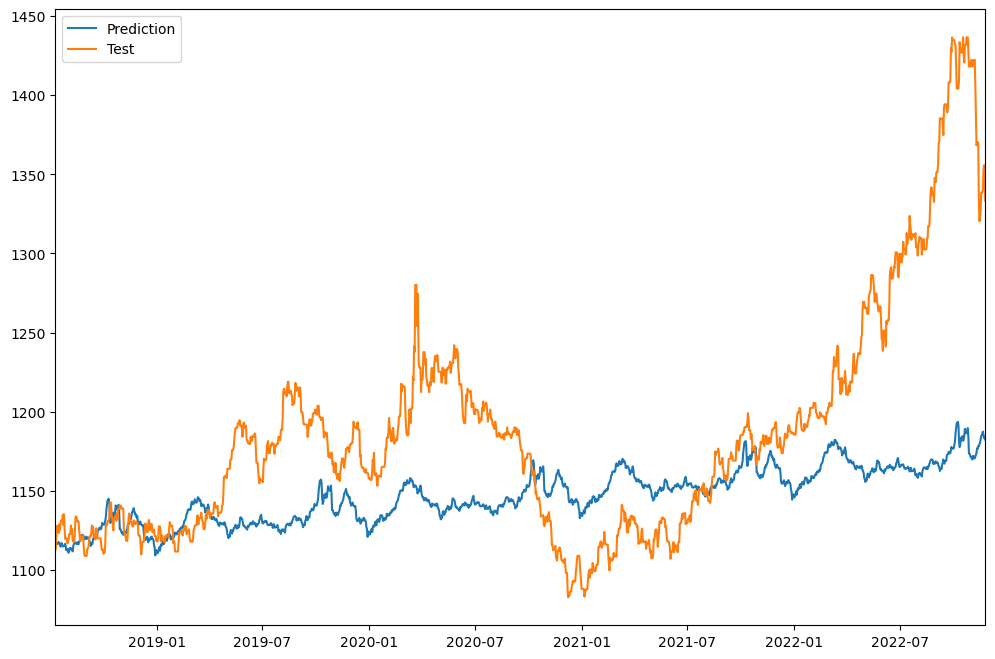

In [208]:
start = new_test.index[0]
end = new_test.index[-1]
plt.figure(figsize=(12,8))
plt.xlim(start,end)
plt.plot(pd.date_range(start=new_test.index[0],periods=1600),forecast,label='Prediction')
plt.plot(pd.date_range(start=new_test.index[0],periods=1600),new_test['DollarEx'],label='Test')
plt.legend()

* 확대

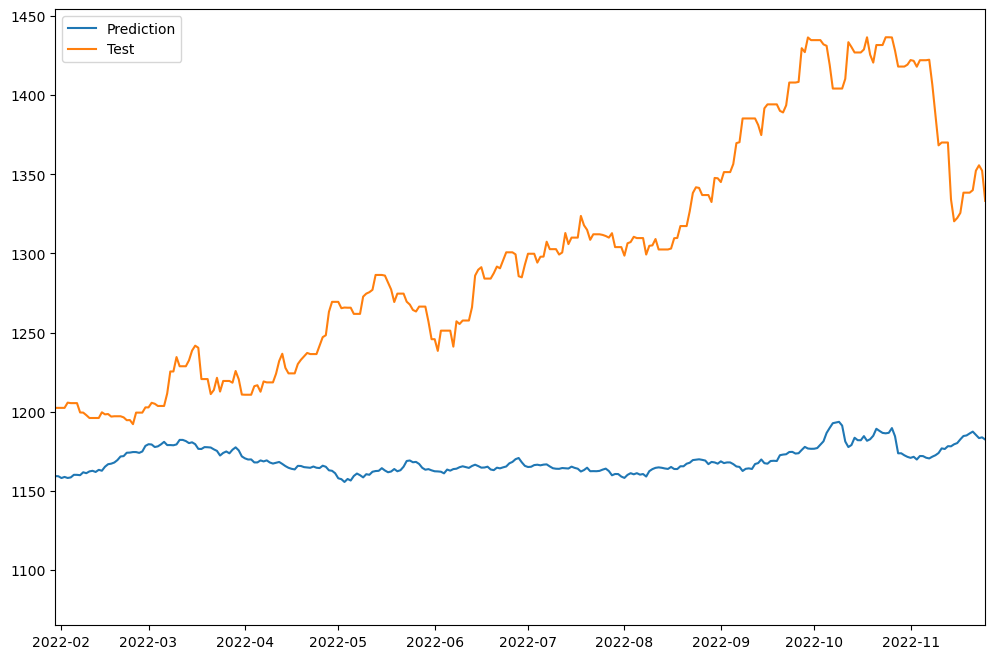

In [209]:
start = new_test.index[-300]
end = new_test.index[-1]
plt.figure(figsize=(12,8))
plt.xlim(start,end)
plt.plot(pd.date_range(start=new_test.index[0],periods=1600),forecast,label='Prediction')
plt.plot(pd.date_range(start=new_test.index[0],periods=1600),new_test['DollarEx'],label='Test')
plt.legend()

# 끝에 부분을 반영하지 못한 이유는 뭘까 너무 LongTermForecasting?

In [210]:
from statsmodels.tools.eval_measures import rmse
score = rmse(new_test['DollarEx'],forecast)
score

74.56073523698836

LSTF Issue에서 Trend와 Seasonal을 발견하기 힘들어서 그런 것은 아닐까?
<br>-> train데이터를 더 최근 것만 가져와보기

In [67]:
len(new_df)

7998

## 더 최근에 데이터 셋만을 사용해 보기

In [285]:
new_train=new_df.iloc[-150:-24]
new_test=new_df.iloc[-24:]
new_model = ExponentialSmoothing(endog=np.array(new_train['DollarEx']),trend='mul',
                                 dates=new_train.index,
                                 freq='d',seasonal='mul',seasonal_periods=33).fit()
#damped_trend=True and seasonal='mul' 결과가 이상
forecast=new_model.predict(start=new_test.index[0],end=new_test.index[-1])
forecast

array([1421.34089797, 1419.50451089, 1425.62267683, 1422.61211143,
       1420.79924779, 1422.63664631, 1416.42124283, 1416.27694277,
       1419.60421407, 1423.97985166, 1423.9360706 , 1428.2234507 ,
       1435.56413215, 1432.0739897 , 1434.90169963, 1433.78098208,
       1433.69271054, 1430.81451281, 1436.63564778, 1434.56772286,
       1436.29616681, 1437.72887263, 1440.41663522, 1439.35711721])

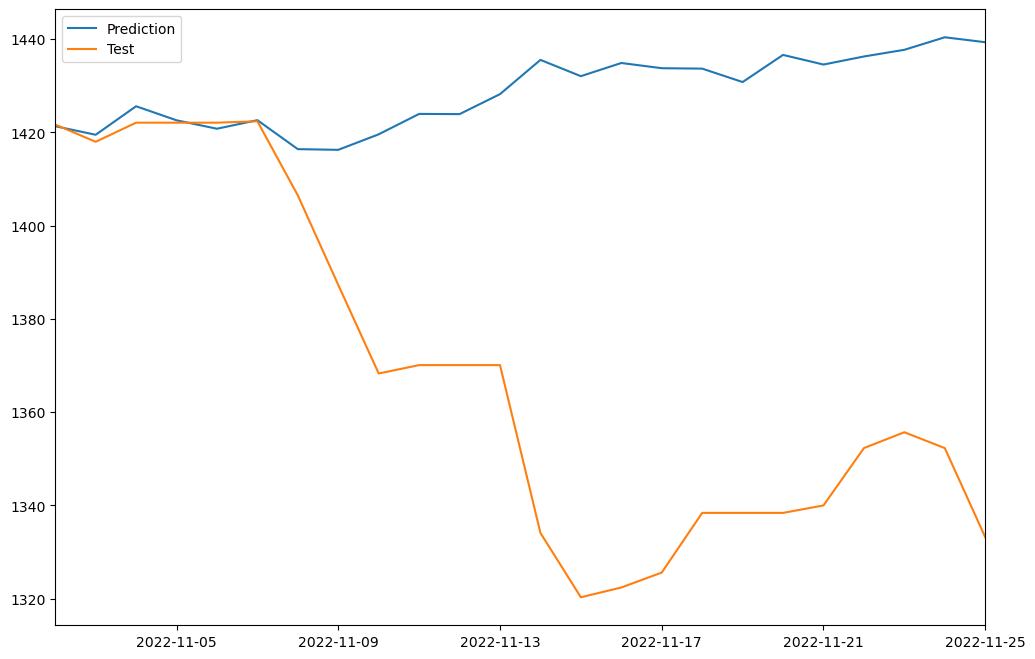

In [286]:
start = new_test.index[0]
end = new_test.index[-1]
plt.figure(figsize=(12,8))
plt.xlim(start,end)
plt.plot(pd.date_range(start=new_test.index[0],periods=24),forecast,label='Prediction')
plt.plot(pd.date_range(start=new_test.index[0],periods=24),new_test['DollarEx'],label='Test')
plt.legend()

In [287]:
from statsmodels.tools.eval_measures import rmse
score = rmse(new_test['DollarEx'],forecast)
score

73.29940988106505

# ETS로 예측

In [288]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [289]:
new_train=new_df.iloc[:-24]
new_test=new_df.iloc[-24:]

In [309]:
model = ETSModel(endog=np.array(new_train['DollarEx']),error='mul',dates=new_train.index
                 ,freq='d',trend='mul').fit()
# seasonal='add',seasonal_periods=7, 
# 4 for quarterly data with an
# annual cycle or 7 for daily data with a weekly cycle

In [310]:
prediction=model.predict(start=new_test.index[0],end=new_test.index[-1])
prediction

array([1422.24754768, 1422.29538224, 1422.34321841, 1422.39105619,
       1422.43889557, 1422.48673657, 1422.53457917, 1422.58242339,
       1422.63026921, 1422.67811664, 1422.72596568, 1422.77381633,
       1422.82166859, 1422.86952246, 1422.91737794, 1422.96523503,
       1423.01309372, 1423.06095403, 1423.10881595, 1423.15667947,
       1423.20454461, 1423.25241136, 1423.30027971, 1423.34814968])

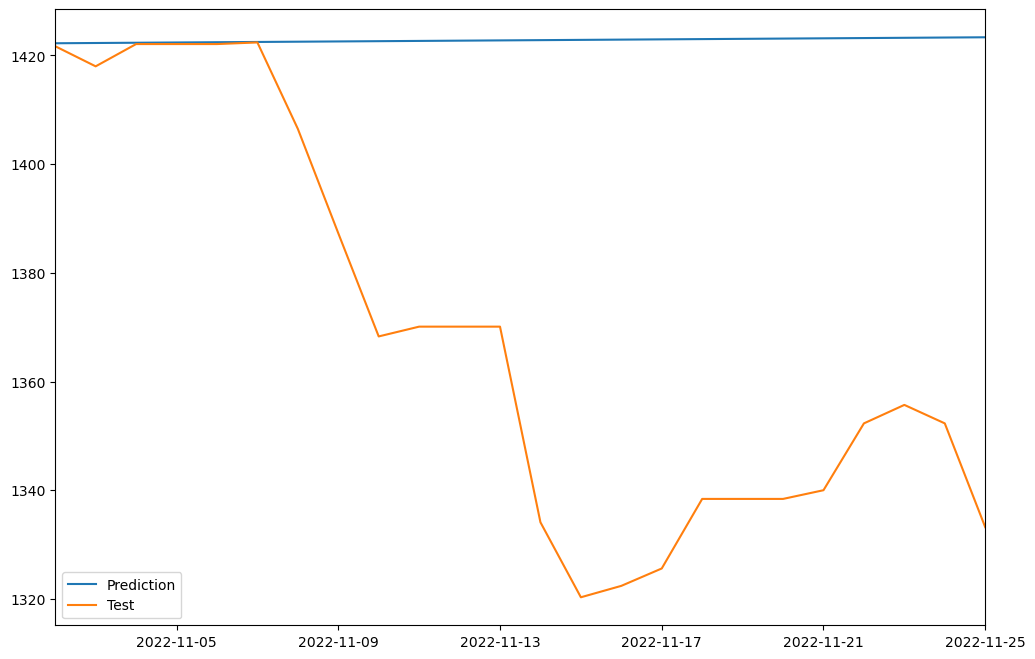

In [311]:
start = new_test.index[0]
plt.figure(figsize=(12,8))
plt.xlim(start,end)
plt.plot(pd.date_range(start=new_test.index[0],periods=24),prediction,label='Prediction')
plt.plot(pd.date_range(start=new_test.index[0],periods=24),new_test['DollarEx'],label='Test')
plt.legend()

In [312]:
from statsmodels.tools.eval_measures import rmse
score = rmse(new_test['DollarEx'], prediction)
score

65.1706055287168

## ARIMA

In [313]:
from pmdarima import auto_arima
from pmdarima.arima import ndiffs,ARIMA

In [384]:
new_train=new_df.iloc[:-24]
new_test=new_df.iloc[-24:]

In [385]:
ndiffs(x=new_train)

1

In [386]:
model=auto_arima(y=new_train,d=1,trace=True,m=7)

C:\Users\samsung\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=50883.931, Time=14.51 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=51073.711, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=50892.141, Time=0.97 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=50890.622, Time=2.23 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=51071.805, Time=0.16 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=50881.400, Time=13.52 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=50881.294, Time=7.21 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=50881.642, Time=11.64 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=50890.994, Time=7.00 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=50881.957, Time=5.36 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=50885.096, Time=7.56 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=50852.446, Time=12.09 sec
 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=50853.930, Time=19.70 sec
 ARIMA(2,1,3)(0,0,1)[7] intercept   : AIC=50854.503, Time=21.95 sec
 ARIMA(2,1,3)

In [324]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7974
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -25419.685
Date:                Wed, 30 Nov 2022   AIC                          50851.369
Time:                        14:45:15   BIC                          50893.272
Sample:                             0   HQIC                         50865.714
                               - 7974                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4276      0.004    404.591      0.000       1.421       1.434
ar.L2         -0.9786      0.004   -278.739      0.000      -0.985      -0.972
ma.L1         -1.2761      0.005   -253.053      0.000      -1.286      -1.266
ma.L2          0.7788      0.006    137.262      0.000       0.768       0.790
ma.L3          0.1323      0.004     34.712      0.000       0.125       0.140
sigma2        34.4138      0.141    243.685      0.000      34.137      34.691
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           1017064.22
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ljung-Box 검정의 귀무가설: 잔차가 백색잡음 시계열을 따른다

- 여기서는 신뢰수준이 0.88 이므로 유의수준 0.05 보다 크므로 귀무가설을 기각하지 못하고 따라서 백색잡음 시계열이다

Jaque-Bera(JB)의 귀무가설: 잔차가 정규성을 띤다

- 0.00 으로 유의수준0.05와 비교했을때 귀무가설을 기각한다 따라서 잔차가 정규성을 따르지 않음을 알 수 있다

Skew(비대칭도)는 0에 가까워야 하고 첨도는 3에 가까워야지 잔차가 정규분포를 따른다

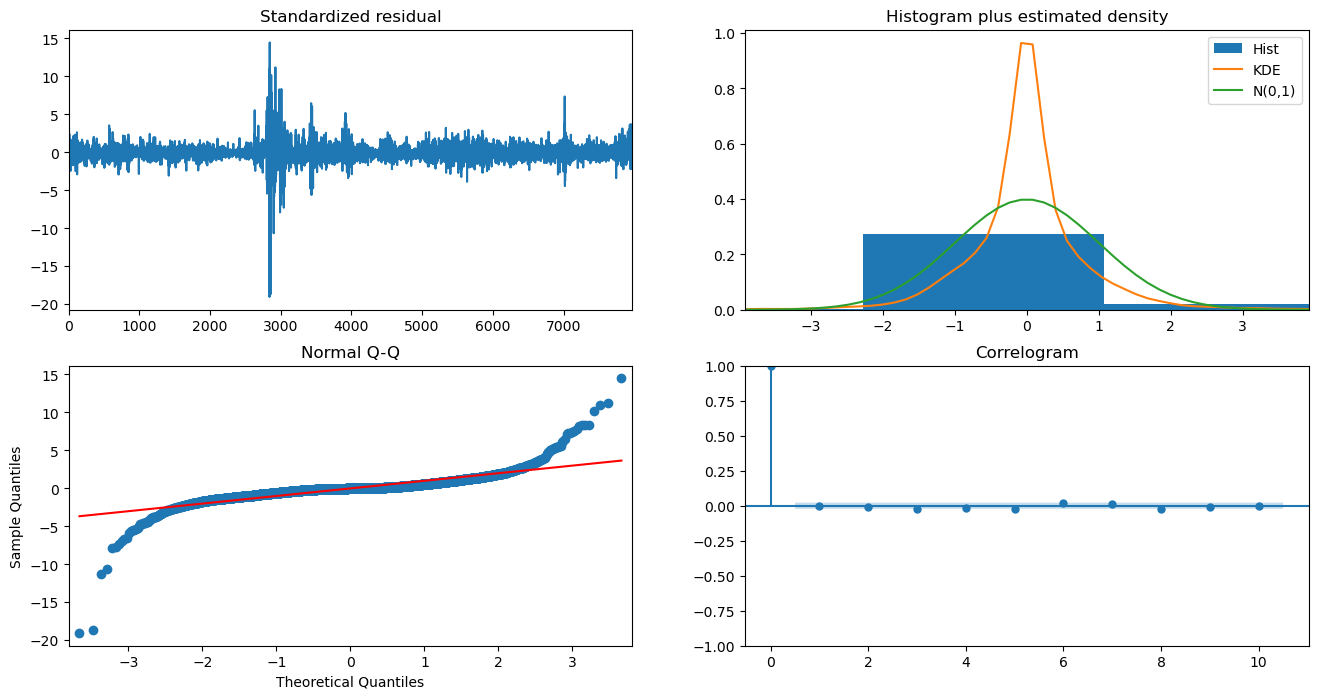

In [325]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

잔차가 백색잡음을 따르는지 보여주는 plot은 Standardized residual과 correlogram이다

- Standardized residual은 잔차를 그냥 시계열로 그린 것이다. 백색 잡음 답게 잔차의 시계열이 평균0을 중심으로 무작위하게 움직이는 것을 볼 수 있다
- Correlogram은 잔차에 대한 ACF이다 
- Histogram plus estimated density는 잔차의 히스토그램을 그려 정규 분포N(0,1)과 밀도를 추정한 그래프를 같이 겹쳐서 보여준다. 위 비대칭도와 첨도에서 확인했던 것처럼 정규분포와 비슷하게 대칭적이지만, 첨도가 더 뾰족하게 솟아오른 것을 알 수 있다
-<font color=blue> Normal Q-Q 그래프는 Q-Q 플랏으로 정규성을 만족한다면 빨간 일직선 위에 점들이 분포해야 한다 그러나, 양 끝 쪽에서 빨간선을 벗어난다</font>

---
파란색은 잘 모르겠는 것

In [88]:
# 테스트 데이터 예측
prediction = model.predict(n_periods=len(new_test))
pred_df = pd.DataFrame({'Prediction':prediction},index=new_test.index)

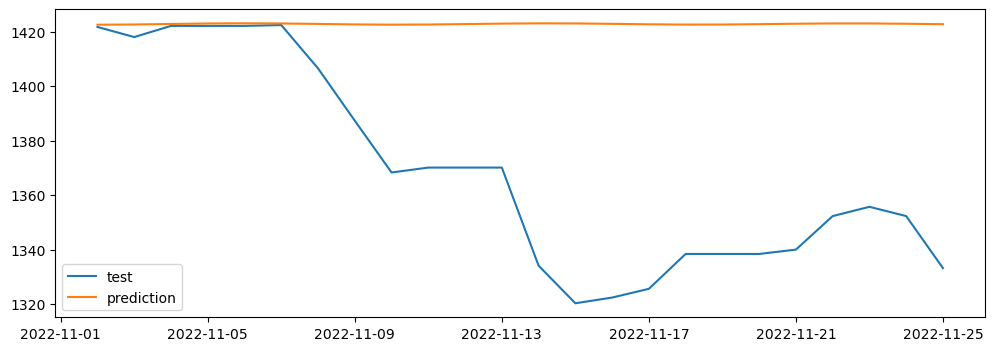

In [326]:
fig,axes = plt.subplots(1,1,figsize=(12,4))
plt.plot(new_test,label='test')
plt.plot(pred_df,label='prediction')
plt.legend()

In [317]:
prediction

array([1422.24754768, 1422.29538224, 1422.34321841, 1422.39105619,
       1422.43889557, 1422.48673657, 1422.53457917, 1422.58242339,
       1422.63026921, 1422.67811664, 1422.72596568, 1422.77381633,
       1422.82166859, 1422.86952246, 1422.91737794, 1422.96523503,
       1423.01309372, 1423.06095403, 1423.10881595, 1423.15667947,
       1423.20454461, 1423.25241136, 1423.30027971, 1423.34814968])

In [90]:
from statsmodels.tools.eval_measures import rmse
score = rmse(new_test['DollarEx'],prediction)
score

65.0187205637113

ETS의 rmse인 64.9015325320445 와 비슷한 성능을 갖는다

### Training Data의 개수를 조정

In [351]:
new_train=new_df.iloc[-100:-20]
new_test=new_df.iloc[-20:]
model=auto_arima(y=new_train,d=1,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=528.972, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=530.679, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=530.653, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=530.440, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=532.563, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.330 seconds


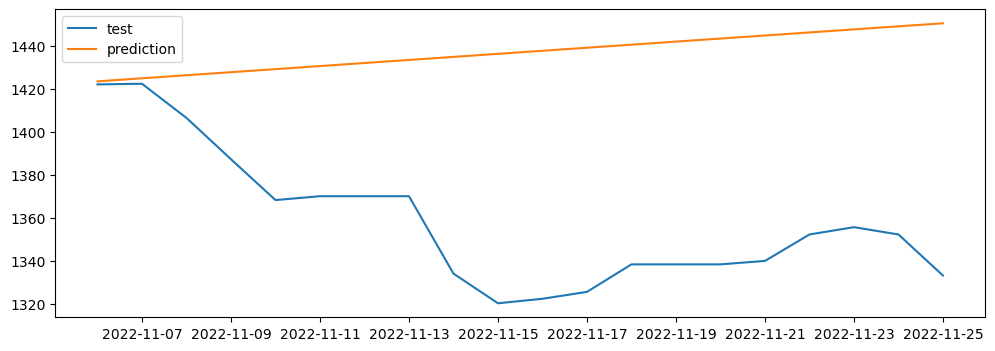

In [352]:
# 테스트 데이터 예측
prediction = model.predict(n_periods=len(new_test))
pred_df = pd.DataFrame({'Prediction':prediction},index=new_test.index)
fig,axes = plt.subplots(1,1,figsize=(12,4))
plt.plot(new_test,label='test')
plt.plot(pred_df,label='prediction')
plt.legend()

위와 같이 prediction 결과가 단순하게 나온 것을 확인 할 수 있는데 이유는 다음과 같다

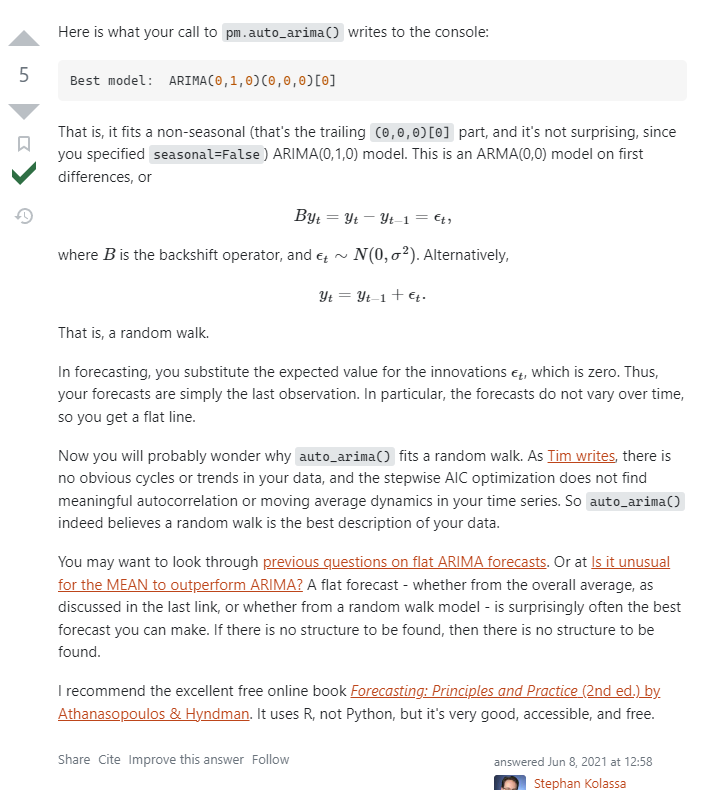

[출처]https://stats.stackexchange.com/questions/529827/python-auto-arima-predicts-constant-value

### ARIMA로 양질의 예측을 하기위해서 Iterated Method Solution(IMS)를 사용해 볼 것이다<br>
이를 위해서는 테스트 데이터를 한번에 예측하는 것이 아니라 한번 예측후 정답 label을 관찰해서 다시 Training하고

다음것을 예측한다

In [357]:
new_train=new_df.iloc[:-24]
new_test=new_df.iloc[-24:]

In [358]:
new_train

,DollarEx
DateTime,
2001-01-02,1259.7
2001-01-03,1267.8
2001-01-04,1285.4
2001-01-05,1249.3
2001-01-06,1249.3
...,...
2022-10-28,1418.1
2022-10-29,1418.1
2022-10-30,1418.1


In [373]:
def IMS(training_set,period,test_set): # training_set은 데이터프레임
    new_training = training_set
    new_t = test_set.index[0]
    pred_list = []
    for i in range(period):
        model = ARIMA(order=(2,1,3)).fit(new_training) 
        #auto_arima로 시간이 너무 오래걸림 대부분의 경우 2,1,3 order를 갖음
        prediction = model.predict(1)
        if i==0: new_t=new_t
        else: new_t = new_t + datetime.timedelta(1)
        pred_list.append(prediction)
        new_row = pd.DataFrame({'DollarEx' : test_set['DollarEx'].iloc[i]},
                               index=[new_t]) 
        # 바로 윗 부분에서 다음시점 값을 미리 알려주었기 때문에 그래프가 어느정도 잘 예측하는
        # 것처럼 보일뿐이다
        print(new_row)
        print(type(new_t))
        new_training = pd.concat([new_training,new_row],ignore_index=True)
        
    return pred_list

In [374]:
pred=IMS(new_train,24,new_test)
pred

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-02    1421.7
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
            DollarEx
2022-11-03    1418.0
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-04    1422.1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-05    1422.1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
            DollarEx
2022-11-06    1422.1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
            DollarEx
2022-11-07    1422.4
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
            DollarEx
2022-11-08    1406.5
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-09    1387.3
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-10    1368.3
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-11    1370.1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-12    1370.1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-13    1370.1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-14    1334.1
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-15    1320.3
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-16    1322.4
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
            DollarEx
2022-11-17    1325.6
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-18    1338.4
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
            DollarEx
2022-11-19    1338.4
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-20    1338.4
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-21    1340.0
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-22    1352.3
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-23    1355.7
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-24    1352.3
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            DollarEx
2022-11-25    1333.2
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


[array([1422.42464656]),
 array([1421.38760792]),
 array([1417.31339119]),
 array([1422.74986148]),
 array([1422.21667401]),
 array([1422.34913269]),
 array([1422.61294144]),
 array([1403.9488282]),
 array([1384.40160234]),
 array([1365.45706187]),
 array([1370.67204534]),
 array([1370.77920816]),
 array([1371.02039222]),
 array([1329.12117002]),
 array([1318.56124805]),
 array([1322.49270714]),
 array([1325.61794999]),
 array([1340.59661432]),
 array([1338.65067062]),
 array([1339.06029442]),
 array([1340.15751342]),
 array([1354.01511947]),
 array([1355.6159893]),
 array([1351.22534462])]

In [380]:
prediction = [i[0] for i in pred]
prediction

[1422.424646556016,
 1421.387607919036,
 1417.3133911874042,
 1422.7498614794683,
 1422.2166740071198,
 1422.349132689448,
 1422.6129414383215,
 1403.9488281983097,
 1384.4016023421975,
 1365.457061865794,
 1370.672045340602,
 1370.7792081557773,
 1371.0203922158917,
 1329.1211700247068,
 1318.5612480486016,
 1322.4927071447023,
 1325.6179499931036,
 1340.596614323494,
 1338.6506706154248,
 1339.0602944170796,
 1340.157513423078,
 1354.0151194741775,
 1355.6159893038114,
 1351.225344615796]

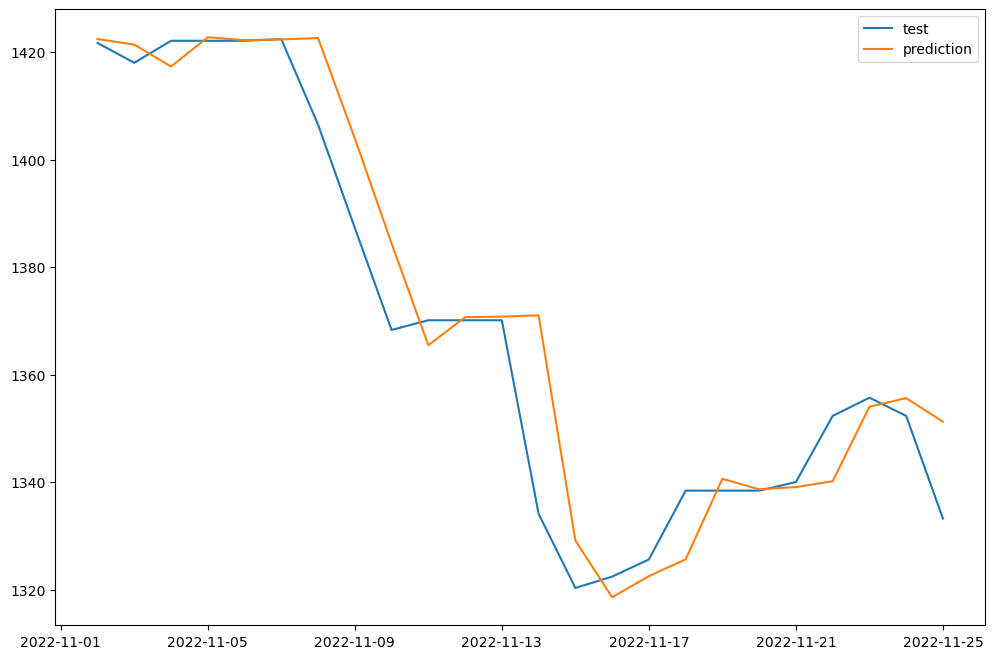

In [381]:
fig = plt.figure(figsize=(12,8))
plt.plot(new_test.index,new_test['DollarEx'],label='test')
plt.plot(new_test.index,prediction,label='prediction')
plt.legend()

실패 -> prediction이 이전시점의 값에 크게 의존하고 있음이 보인다+진정한 Forecasting이 안됨

# Conclusion

Holt-Winters seasonality method ARIMA와 ETS 모델은 trend와 seasonality가 Non-clear한 데이터에 대해서 잘맞지 않는다-> 그중에 그나마 Holt-Winters seasonallity method의 rmse값이 가장 적게 나왔다

ExchangeRate 데이터는 변동성이 크고 trend와 seasonality가 clear하지 않기 때문에 위의 모델들이 적합하지 않다
또한 위의 데이터들에 적합되는 Arima 모델을 살펴보면 차분을 1회 진행하고 과거 데이터 변수가 2개 과거 잔차 데이터 변수가 3개로 적합됨을 볼 수 있는데 ARIMA 또한 회귀의 관점에서 보면 위와같이 변동성이 심한 데이터를 적합하는 것은 쉽지 않은 일이다
다음 데이터는 비교적 seasonality와 trend가 clear한 데이터셋을 사용해 보겠다